In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# This function calculates the rise and fall time
def find_mintime_halfmag(y_vals, x_vals): 
    minmag = np.min(y_vals)
    magdiff = 2.5 * np.log10(2)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index], minmag + magdiff

# This function calculates the rise and fall time
def find_rise_fall(x_interp, y_interp, halfmag, mintime):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - halfmag) < 0.05:
            good_xvals = np.append(good_xvals, xval)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

    return mintime - half_rising_JD, half_falling_JD - mintime

# This function includes the last non detection before the first detection
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]


In [3]:
Event_0 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acqfzzw_20220701\\detections_ZTF21acqfzzw.csv")
ND_0 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acqfzzw_20220701\\non_detections_ZTF21acqfzzw.csv")
plotname = Event_0
non_detection = ND_0

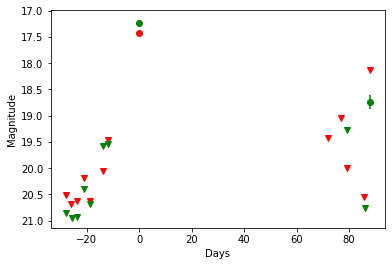

In [4]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.42172
halfmag 18.174294989159954
minmag 17.239084
halfmag 17.99165898915995


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


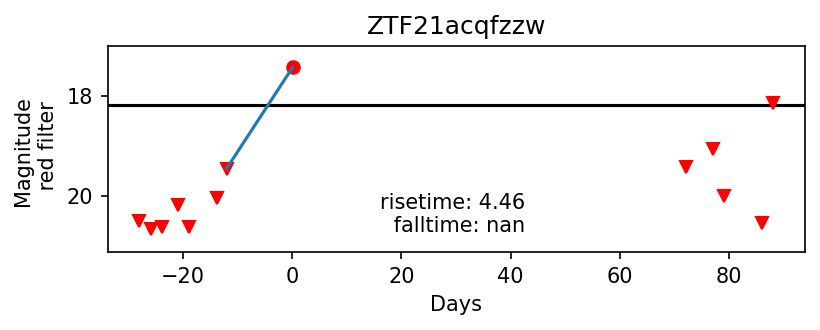

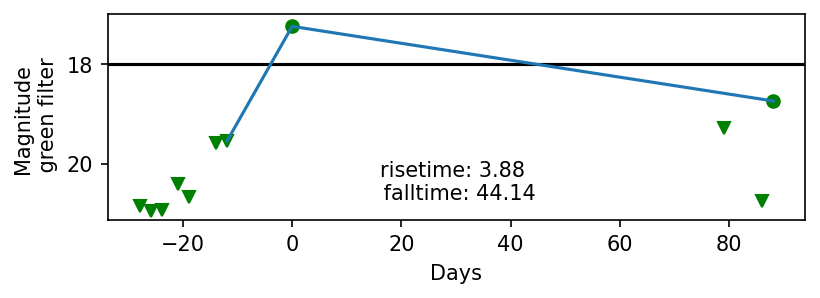

In [6]:
# red filter for Event 0

plotname = Event_0
non_detection = ND_0

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acqfzzw')


# green filter for Event 0
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [11]:
Event_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acjjtmh_20220701\\detections_ZTF21acjjtmh.csv")
ND_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acjjtmh_20220701\\non_detections_ZTF21acjjtmh.csv")
plotname = Event_1
non_detection = ND_1

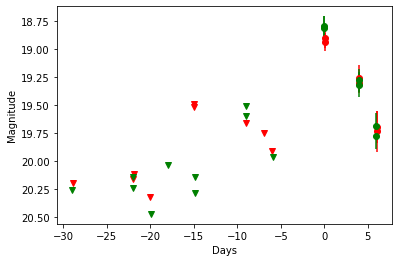

In [12]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.895823
halfmag 19.648397989159953
minmag 18.797314
halfmag 19.549888989159953


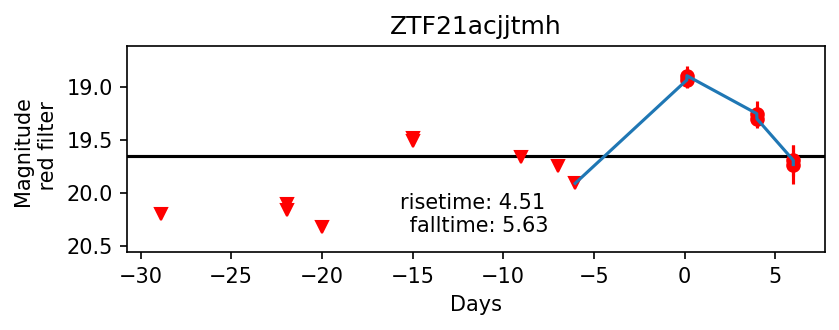

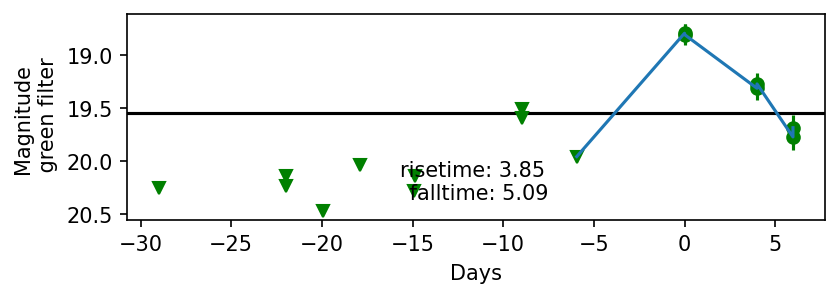

In [14]:
# red filter for Event 1

plotname = Event_1
non_detection = ND_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acjjtmh')


# green filter for Event 1
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [28]:
Event_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acmjabc_20220701\\detections_ZTF21acmjabc.csv")
ND_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acmjabc_20220701\\non_detections_ZTF21acmjabc.csv")
plotname = Event_2
non_detection = ND_2

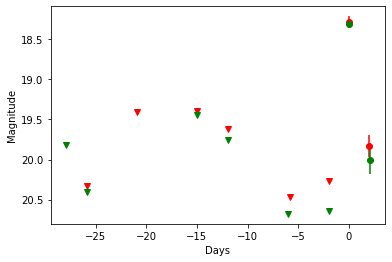

In [29]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.289265
halfmag 19.041839989159953
minmag 18.304289
halfmag 19.056863989159954


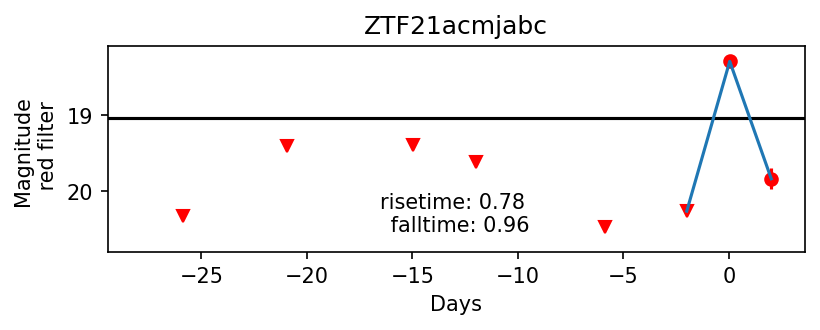

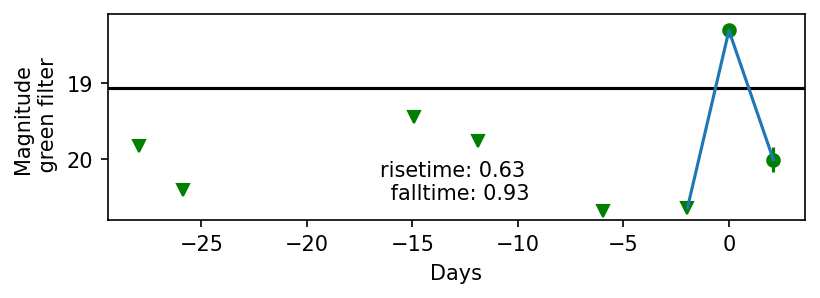

In [30]:
# red filter for Event 2

plotname = Event_2
non_detection = ND_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acmjabc')


# green filter for Event 2
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [25]:
Event_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aaibbvy_20220701\\detections_ZTF22aaibbvy.csv")
ND_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aaibbvy_20220701\\non_detections_ZTF22aaibbvy.csv")
plotname = Event_3
non_detection = ND_3

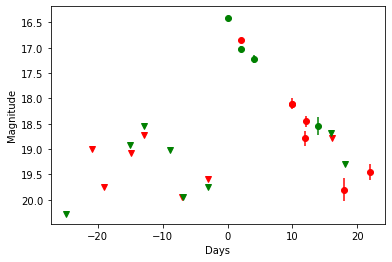

In [26]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.853136
halfmag 17.605710989159952
minmag 16.411434
halfmag 17.164008989159953


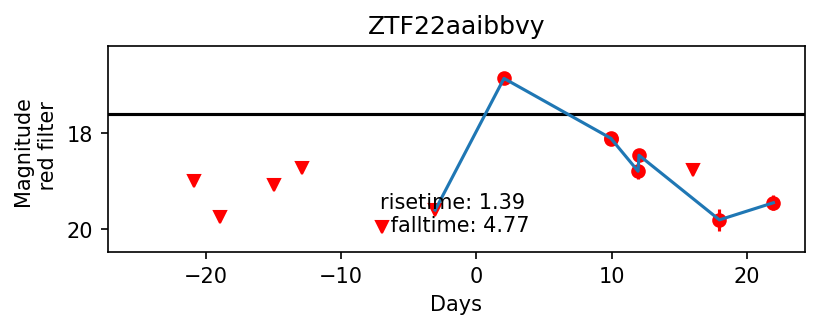

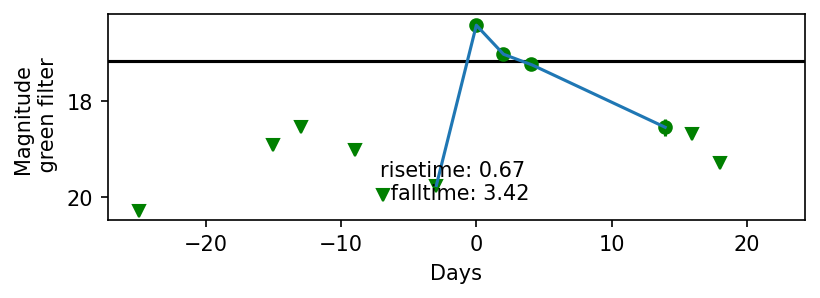

In [27]:
# red filter for Event 3

plotname = Event_3
non_detection = ND_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aaibbvy')


# green filter for Event 3
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [21]:
Event_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abppezh_20220701\\detections_ZTF21abppezh.csv")
plotname = Event_4

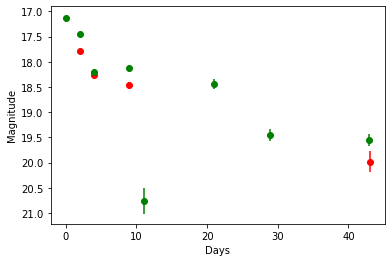

In [22]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.791079
halfmag 18.543653989159953
minmag 17.140968
halfmag 17.893542989159954


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


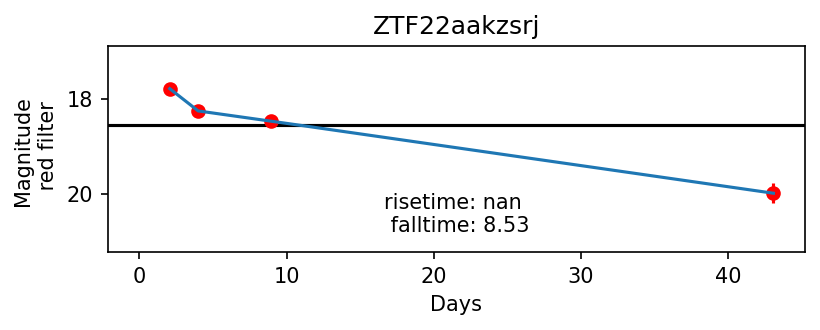

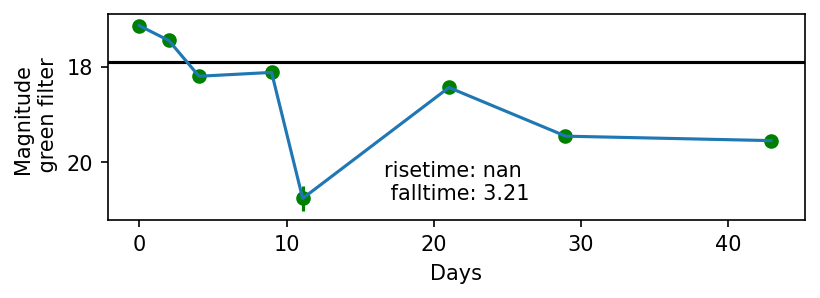

In [24]:
# red filter for event 4

plotname = Event_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abppezh')


# green filter for event 4
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [31]:
Event_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abexegc_20220701\\detections_ZTF21abexegc.csv")
ND_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abexegc_20220701\\non_detections_ZTF21abexegc.csv")
plotname = Event_5
non_detection = ND_5

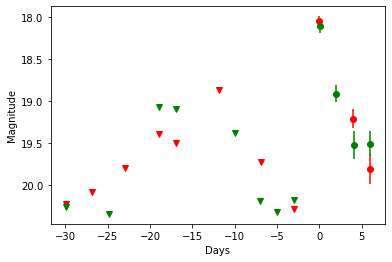

In [32]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.050463
halfmag 18.803037989159954
minmag 18.10683
halfmag 18.859404989159952


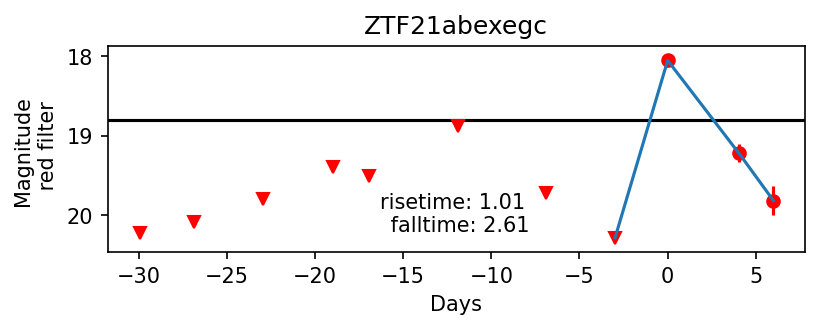

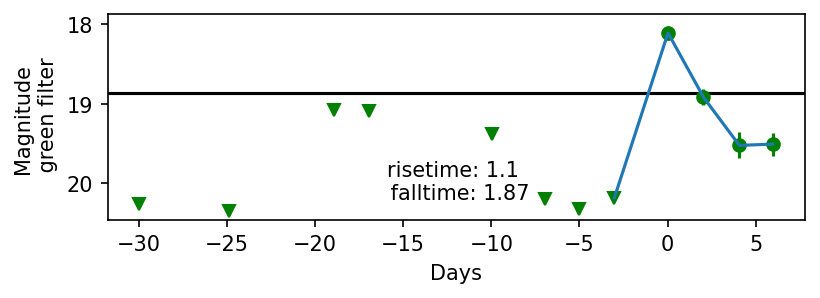

In [35]:
# red filter for Event 5

plotname = Event_5
non_detection = ND_5

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abexegc')


# green filter for Event 5
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [44]:
Event_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abgjdtt_20220701\\detections_ZTF21abgjdtt.csv")
ND_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abgjdtt_20220701\\non_detections_ZTF21abgjdtt.csv")
plotname = Event_6
non_detection = ND_6

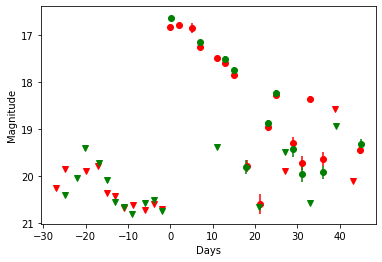

In [45]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.775026
halfmag 17.527600989159954
minmag 16.633007
halfmag 17.385581989159952


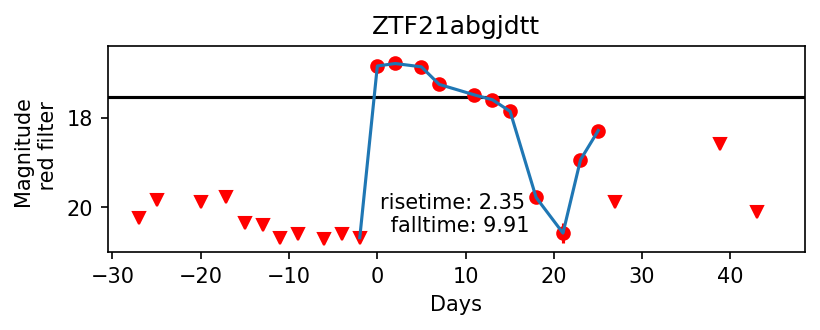

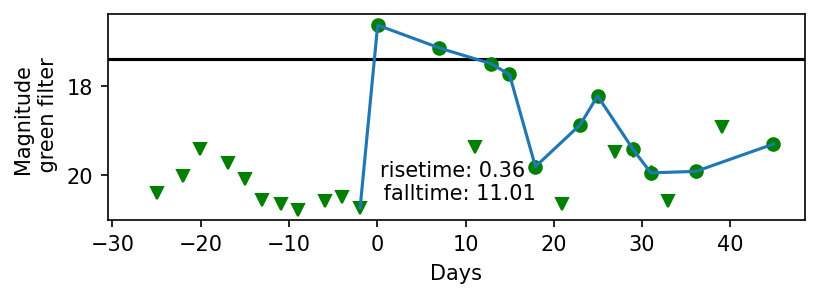

In [46]:
# red filter for Event 6

plotname = Event_6
non_detection = ND_6

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abgjdtt')


# green filter for Event 6
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [40]:
Event_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazyjlz_20220701\\detections_ZTF21aazyjlz.csv")
ND_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazyjlz_20220701\\non_detections_ZTF21aazyjlz.csv")
plotname = Event_7
non_detection = ND_7

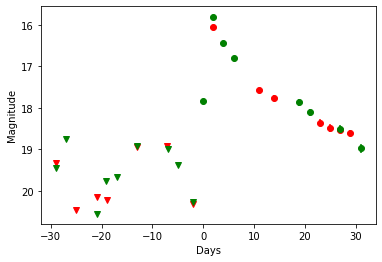

In [41]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.043543
halfmag 16.796117989159953
minmag 15.818412
halfmag 16.57098698915995


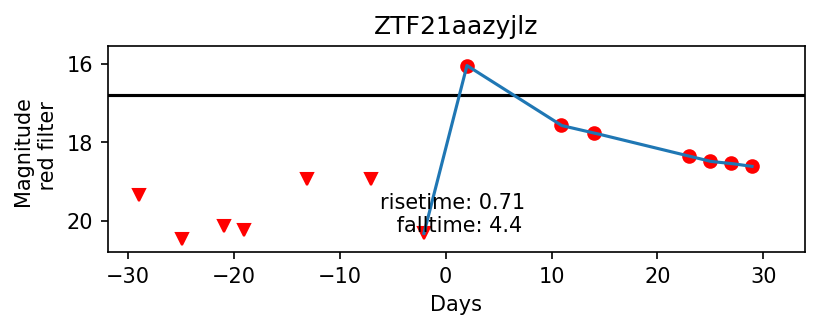

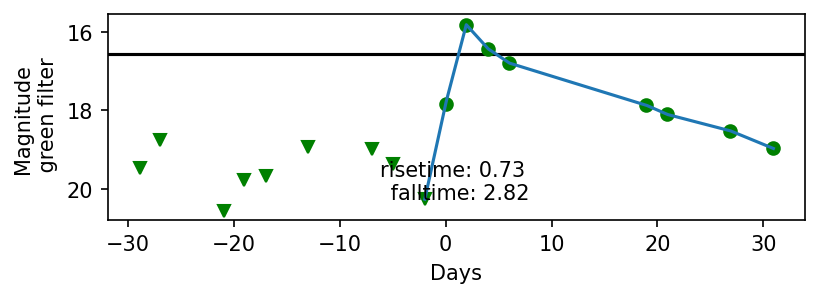

In [43]:
# red filter for Event 7

plotname = Event_7
non_detection = ND_7

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aazyjlz')


# green filter for Event 7
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [47]:
Event_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abcemzh_20220701\\detections_ZTF21abcemzh.csv")
ND_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abcemzh_20220701\\non_detections_ZTF21abcemzh.csv")
plotname = Event_8
non_detection = ND_8

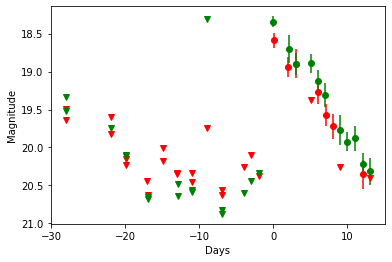

In [48]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.59029
halfmag 19.342864989159953
minmag 18.343027
halfmag 19.095601989159952


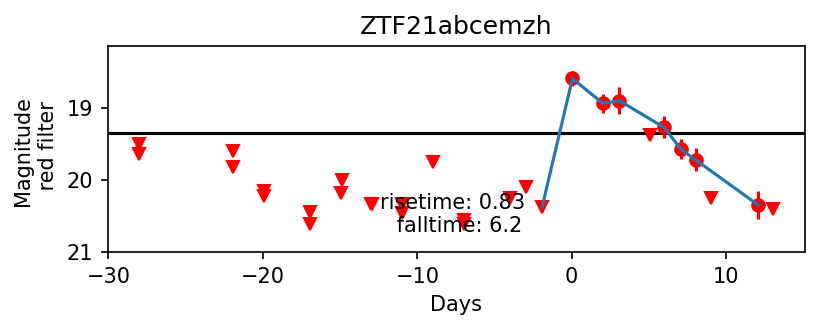

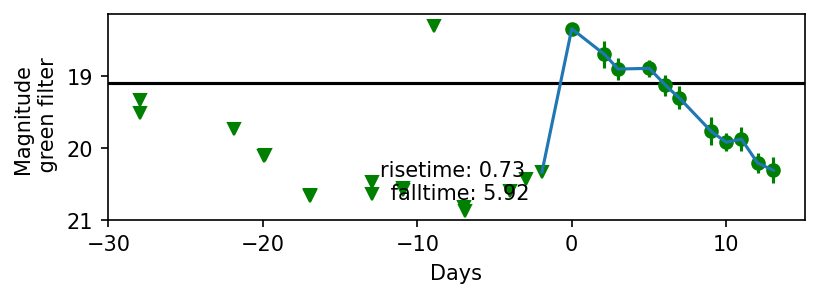

In [50]:
# red filter for Event 8

plotname = Event_8
non_detection = ND_8

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abcemzh')


# green filter for Event 8
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [56]:
Event_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aarrrsx_20220701\\detections_ZTF21aarrrsx.csv")
ND_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aarrrsx_20220701\\non_detections_ZTF21aarrrsx.csv")
plotname = Event_9
non_detection = ND_9

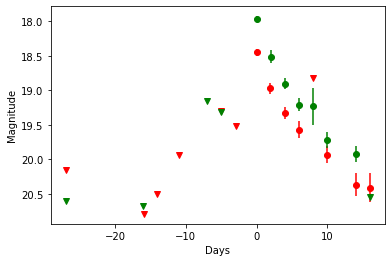

In [57]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.451157
halfmag 19.20373198915995
minmag 17.972212
halfmag 18.724786989159952


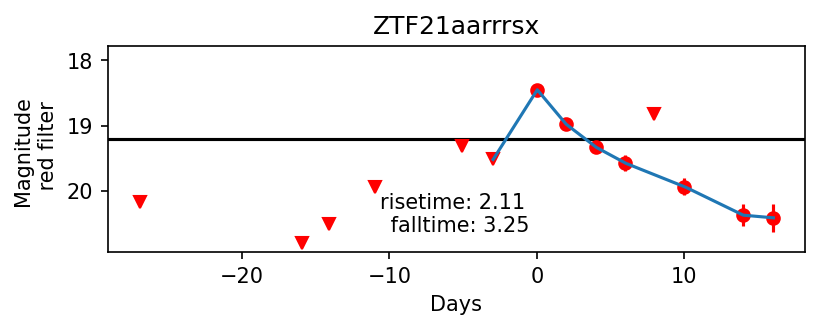

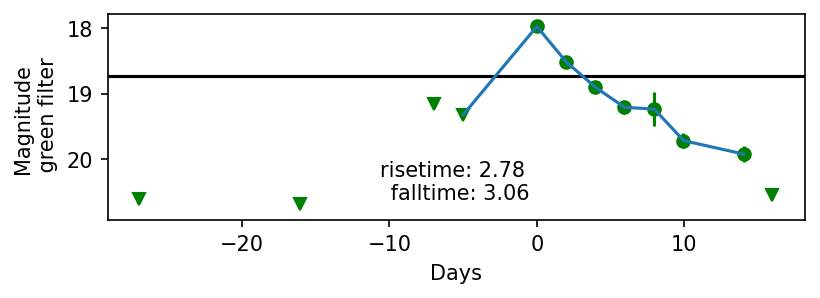

In [58]:
# red filter for Event 

plotname = Event_9
non_detection = ND_9

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aarrrsx')


# green filter for Event 9
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [62]:
Event_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aaqzrat_20220701\\detections_ZTF21aaqzrat.csv")
ND_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aaqzrat_20220701\\non_detections_ZTF21aaqzrat.csv")
plotname = Event_10
non_detection = ND_10

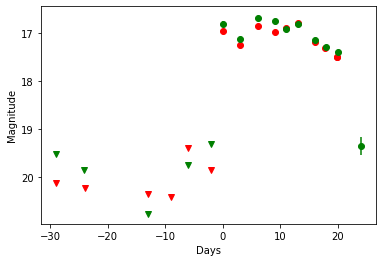

In [63]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.793661
halfmag 17.546235989159953
minmag 16.688824
halfmag 17.441398989159953


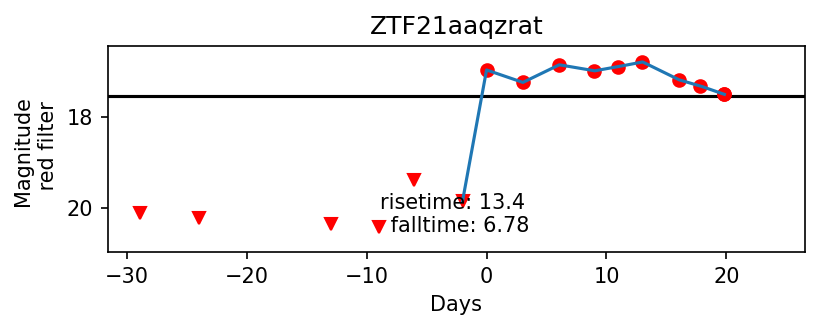

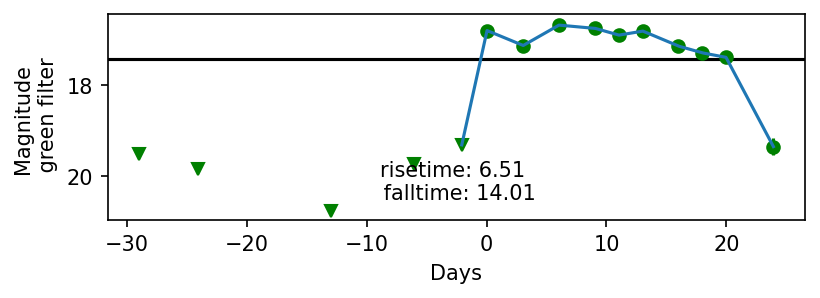

In [64]:
# red filter for Event 

plotname = Event_10
non_detection = ND_10

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aaqzrat')


# green filter for Event 10
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [65]:
Event_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aassaom_20220701\\detections_ZTF21aassaom.csv")
ND_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aassaom_20220701\\non_detections_ZTF21aassaom.csv")
plotname = Event_11
non_detection = ND_11

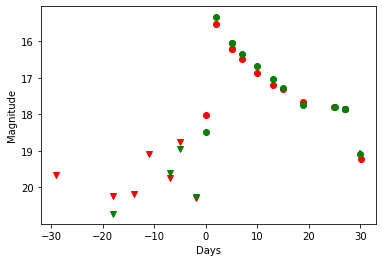

In [66]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 15.522103
halfmag 16.27467798915995
minmag 15.347681
halfmag 16.10025598915995


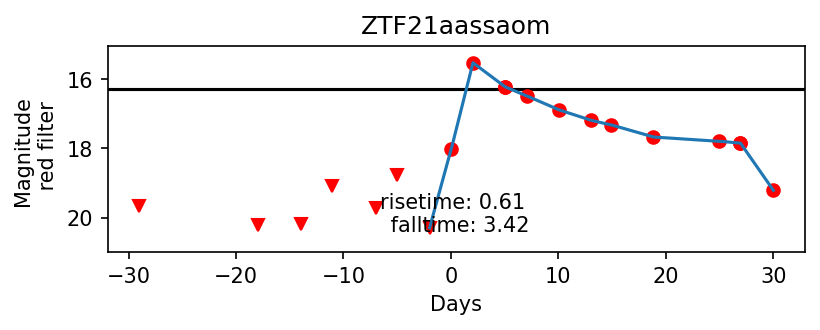

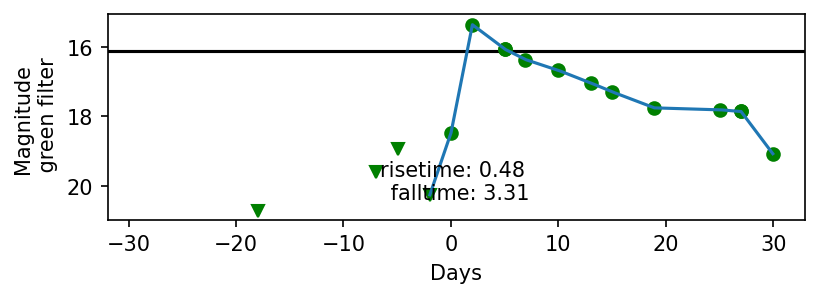

In [67]:
# red filter for Event 11

plotname = Event_11
non_detection = ND_11

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aassaom')


# green filter for Event 11
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [6]:
Event_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abdpqpq_20220701\\detections_ZTF21abdpqpq.csv")
ND_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abdpqpq_20220701\\non_detections_ZTF21abdpqpq.csv")
plotname = Event_12
non_detection = ND_12

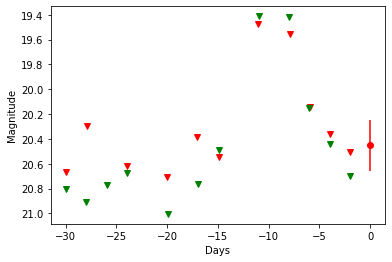

In [7]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 20.45172
halfmag 21.204294989159955


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

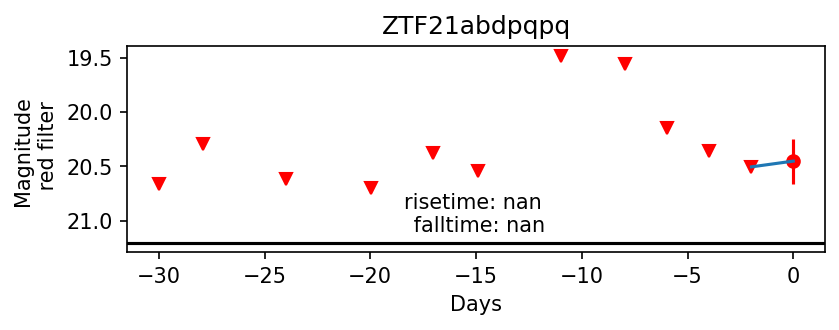

In [8]:
# red filter for Event 12

plotname = Event_12
non_detection = ND_12

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abdpqpq')


# green filter for Event 12
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [ ]:
Event_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aapdvus_20220701\\detections_ZTF21aapdvus.csv")
ND_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aapdvus_20220701\\non_detections_ZTF21aapdvus.csv")
plotname = Event_13
non_detection = ND_13

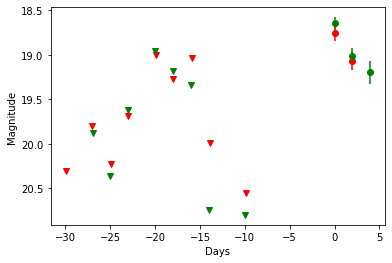

In [72]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.758215
halfmag 19.510789989159953
minmag 18.646734
halfmag 19.39930898915995


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


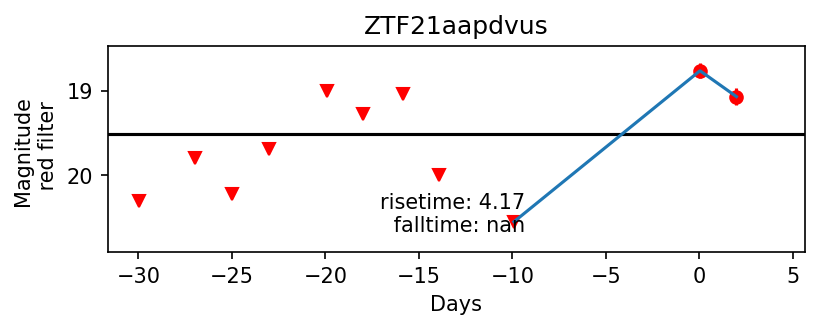

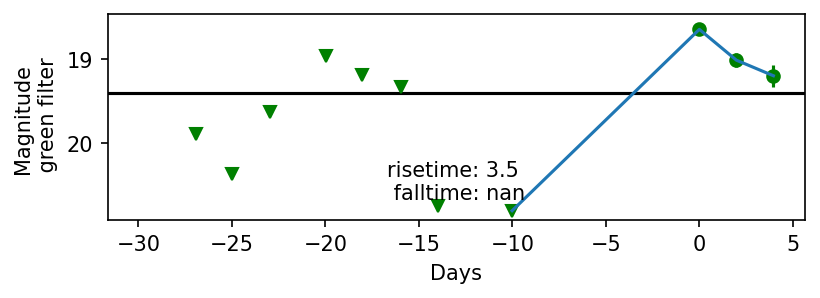

In [74]:
# red filter for Event 13

plotname = Event_13
non_detection = ND_13

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aapdvus')


# green filter for Event 13
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [86]:
Event_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20ackjhue_20220701\\detections_ZTF20ackjhue.csv")
ND_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20ackjhue_20220701\\non_detections_ZTF20ackjhue.csv")
plotname = Event_14
non_detection = ND_14

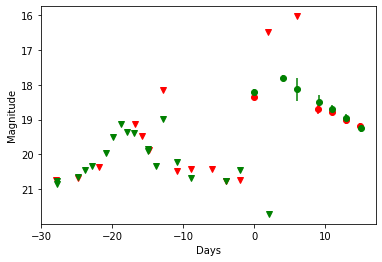

In [87]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.342789
halfmag 19.095363989159953
minmag 17.804174
halfmag 18.556748989159953


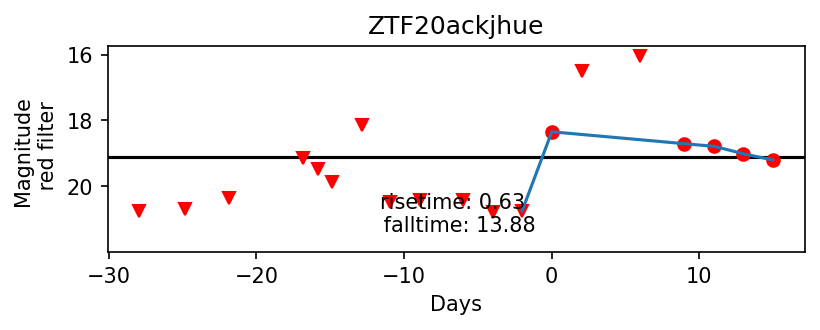

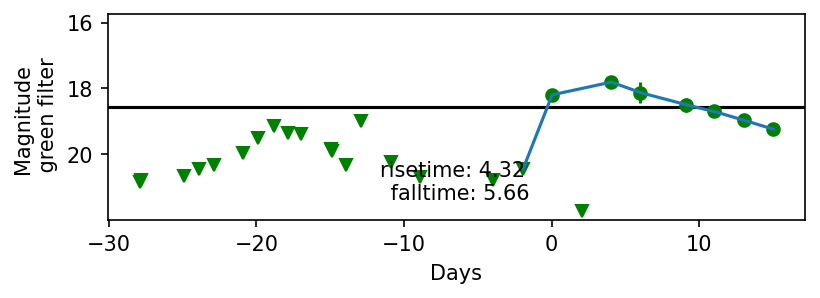

In [88]:
# red filter for Event 14

plotname = Event_14
non_detection = ND_14

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20ackjhue')


# green filter for Event 14
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [89]:
Event_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acohkja_20220701\\detections_ZTF20acohkja.csv")
ND_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acohkja_20220701\\non_detections_ZTF20acohkja.csv")
plotname = Event_15
non_detection = ND_15

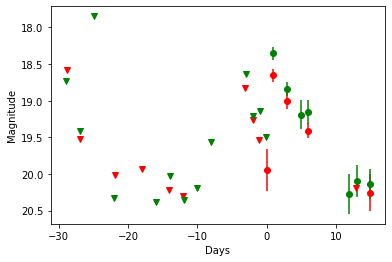

In [90]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.65152
halfmag 19.404094989159955
minmag 18.354631
halfmag 19.107205989159954


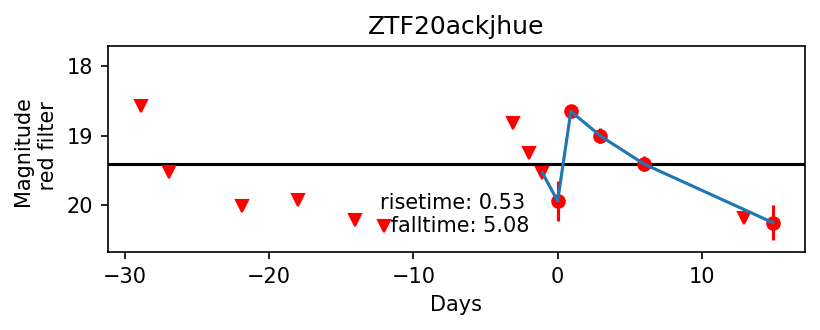

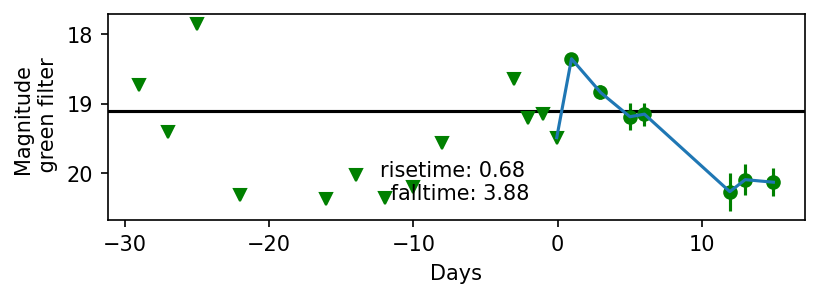

In [91]:
# red filter for Event 15

plotname = Event_15
non_detection = ND_15

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20ackjhue')


# green filter for Event 15
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [92]:
Event_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acthbdd_20220701\\detections_ZTF20acthbdd.csv")
ND_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acthbdd_20220701\\non_detections_ZTF20acthbdd.csv")
plotname = Event_16
non_detection = ND_16

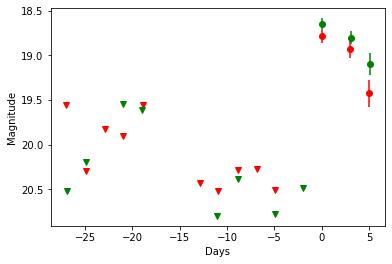

In [93]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.786312
halfmag 19.538886989159952
minmag 18.649305
halfmag 19.40187998915995


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


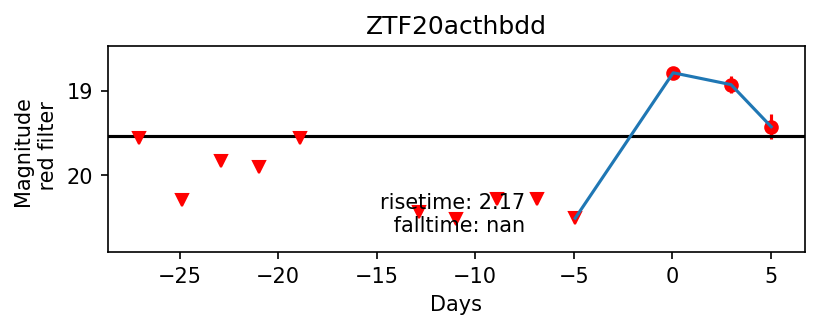

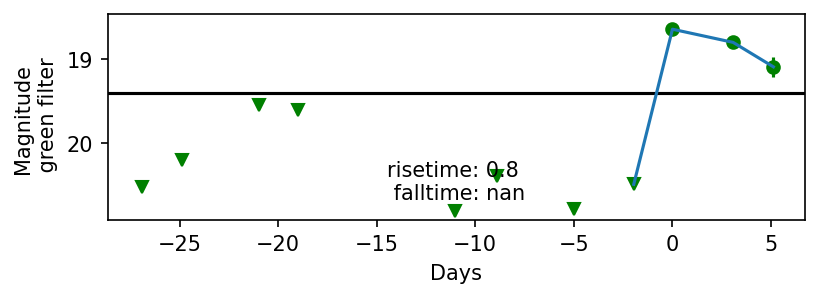

In [95]:
# red filter for Event 16

plotname = Event_16
non_detection = ND_16

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20acthbdd')


# green filter for Event 16
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [119]:
Event_17 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abcdrsm_20220701\\detections_ZTF20abcdrsm.csv")
plotname = Event_17

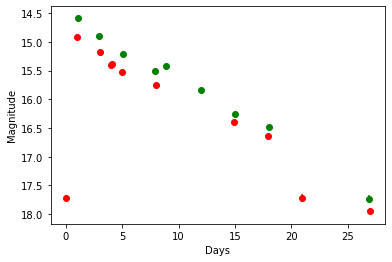

In [120]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 14.918265
halfmag 15.670839989159953
minmag 14.592509
halfmag 15.345083989159953


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


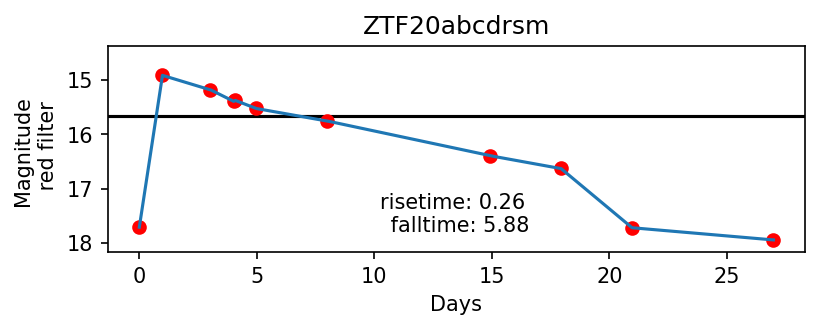

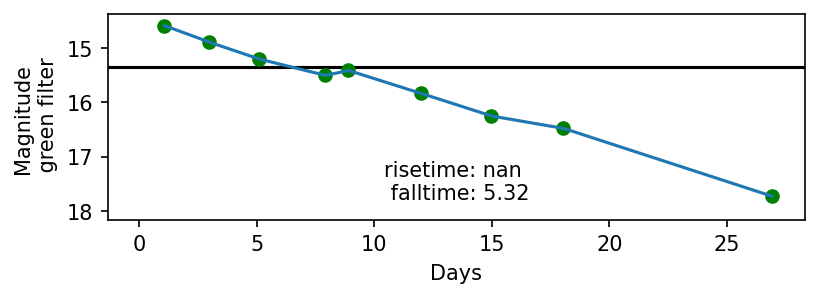

In [121]:
# red filter for event 17

plotname = Event_17

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abcdrsm')


# green filter for event 17
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [99]:
Event_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abqsrvn_20220701\\detections_ZTF20abqsrvn.csv")
ND_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abqsrvn_20220701\\non_detections_ZTF20abqsrvn.csv")
plotname = Event_18
non_detection = ND_18

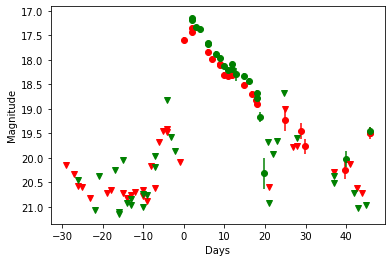

In [101]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 17.345129
halfmag 18.097703989159953
minmag 17.143147
halfmag 17.895721989159952


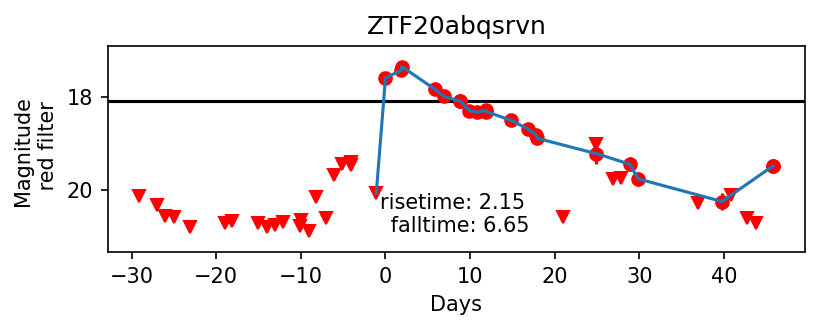

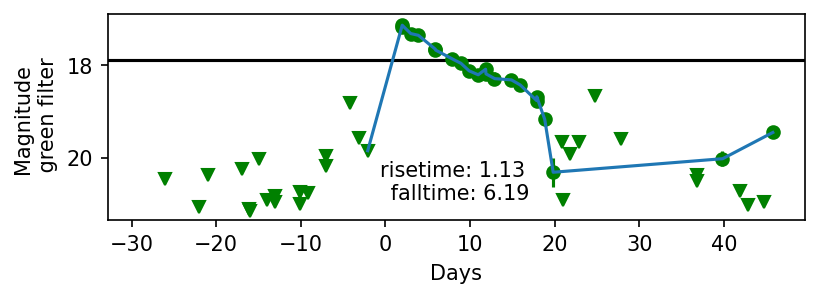

In [103]:
# red filter for Event 18

plotname = Event_18
non_detection = ND_18

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abqsrvn')


# green filter for Event 18
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [111]:
Event_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aaqwejj_20220701\\detections_ZTF20aaqwejj.csv")
ND_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aaqwejj_20220701\\non_detections_ZTF20aaqwejj.csv")
plotname = Event_19
non_detection = ND_19

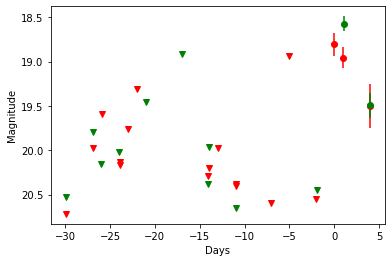

In [112]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 18.806332
halfmag 19.558906989159954
minmag 18.5718
halfmag 19.324374989159953


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


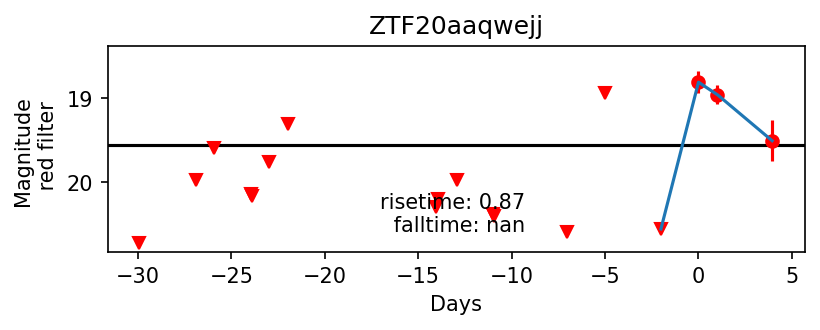

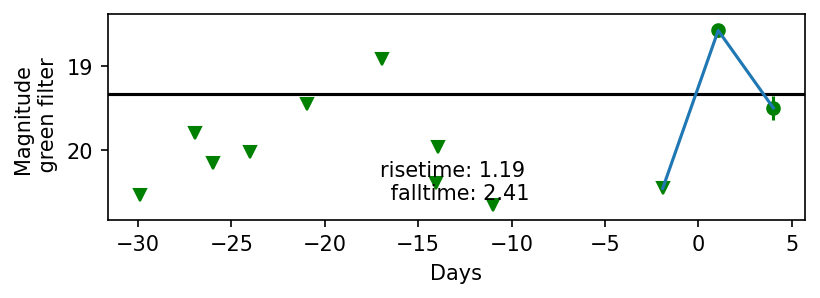

In [113]:
# red filter for Event 19

plotname = Event_19
non_detection = ND_19

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aaqwejj')


# green filter for Event 19
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [114]:
Event_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abwavnp_20220701\\detections_ZTF20abwavnp.csv")
ND_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abwavnp_20220701\\non_detections_ZTF20abwavnp.csv")
plotname = Event_20
non_detection = ND_20

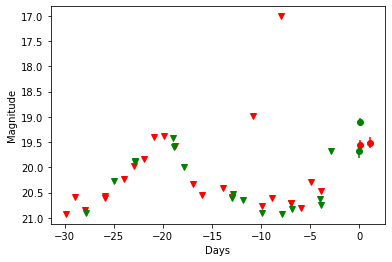

In [115]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 19.511194
halfmag 20.263768989159953
minmag 19.09815
halfmag 19.850724989159954


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


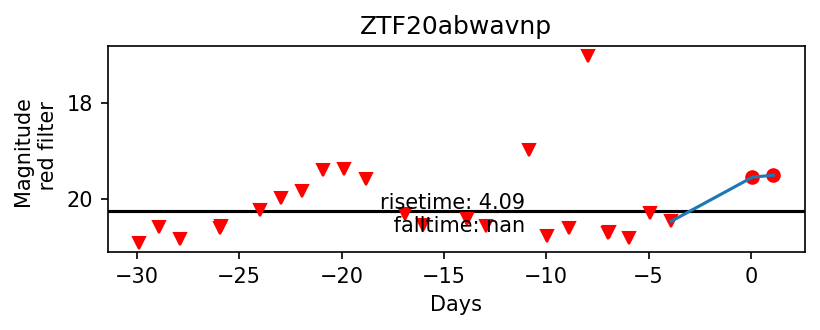

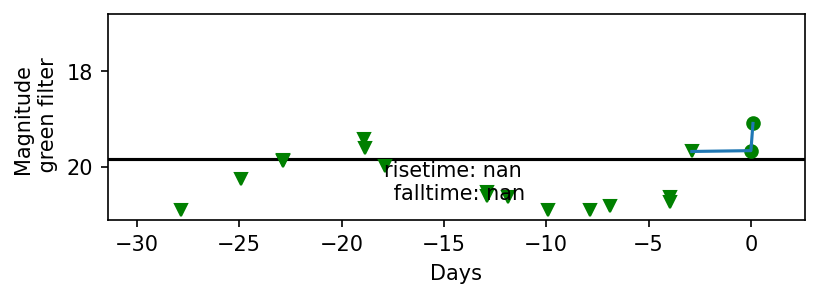

In [116]:
# red filter for Event 20

plotname = Event_20
non_detection = ND_20

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abwavnp')


# green filter for Event 20
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

mintime, halfmag = find_mintime_halfmag(y_sorted, x_sorted)
print(f"minmag {np.min(y_sorted)}")
print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [3]:
Event_21 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abbkwhn_20220701\\detections_ZTF21abbkwhn.csv")
plotname = Event_21

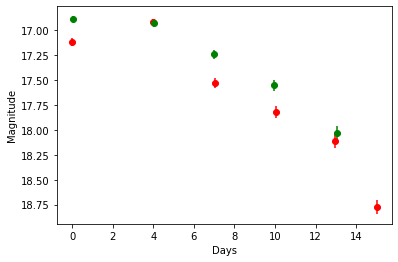

In [4]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

minmag 16.920216
halfmag 17.672790989159953
minmag 16.893578
halfmag 17.646152989159955


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


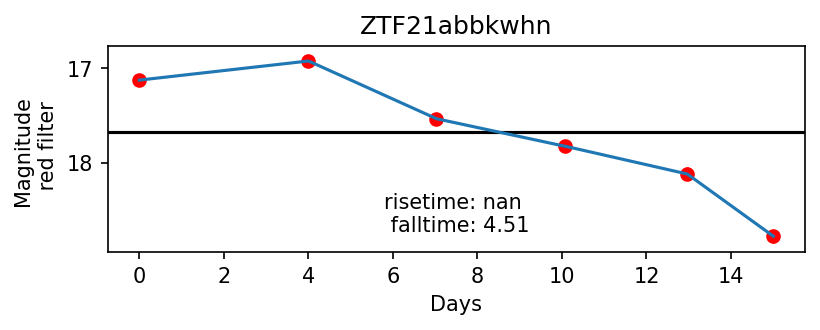

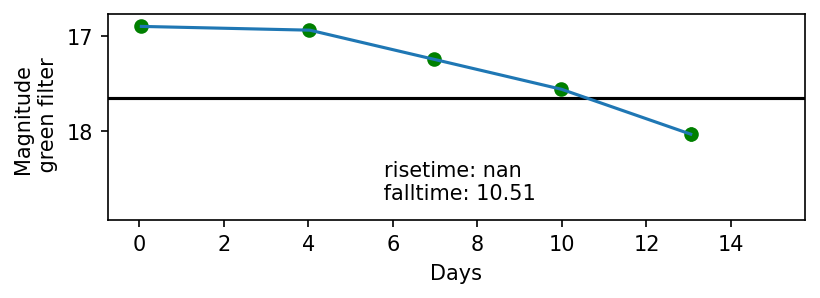

In [5]:
# red filter for event 21

plotname = Event_21

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)
print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f"Magnitude \n red filter")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abbkwhn')


# green filter for event 21
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
mintime, halfmag = find_mintime_halfmag(y_vals, x_vals)

print(f"minmag {np.min(y_vals)}")
print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
risetime, falltime = find_rise_fall(x_interp, y_interp, halfmag, mintime)

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f"Magnitude \n green filter")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [5]:
data_table = pd.read_csv("C:\\Users\\marya\\Downloads\\determine_events_Data_collected_csvversion - Sheet1 (2).csv")
red_rise = data_table['red rise time']
red_fade = data_table['red fade time']
green_rise = data_table['green rise time']
green_fade = data_table['green fade time']


(0.0, 5.0, 0.0, 12.5)

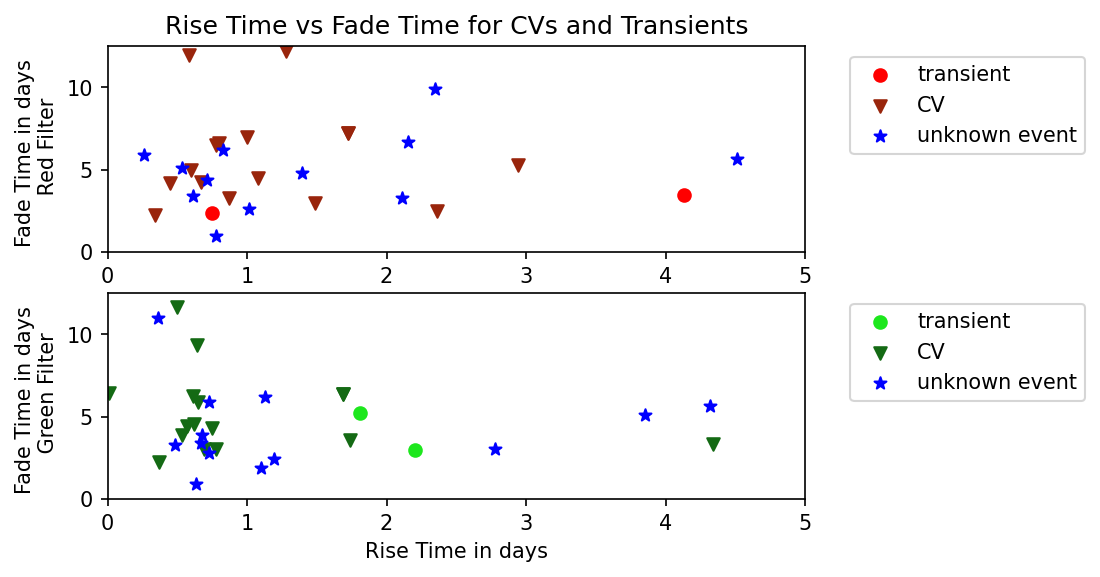

In [40]:
# plot of points with red filter
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
red_trans_rise = red_rise[0:4]
red_trans_rise = red_trans_rise[[False, True, False, True]]
red_trans_fade = red_fade[0:4]
red_trans_fade = red_trans_fade[[False, True, False, True]]
ax1.scatter([red_trans_rise], [red_trans_fade], c='red', label="transient")
red_cv_rise = red_rise[5:25]
red_cv_fade = red_fade[5:25]
ax1.scatter([red_cv_rise], [red_cv_fade], c='#99250C', marker='v', label="CV")
red_event_rise = red_rise[26:48]
#red_event_rise = red_event_rise[[]]
red_event_fade = red_fade[26:48]
#red_event_fade = red_event_fade[[False, True, True, False]]
ax1.scatter([red_event_rise], [red_event_fade], c='blue', marker='*', label="unknown event")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Rise Time vs Fade Time for CVs and Transients')
plt.ylabel(f'Fade Time in days \n Red Filter')

# plot of points with green filter
ax2 = plt.subplot(2,1,2)
green_trans_rise = green_rise[0:4]
green_trans_rise = green_trans_rise[[True, False, False, True]]
green_trans_fade = green_fade[0:4]
green_trans_fade = green_trans_fade[[True, False, False, True]]
ax2.scatter([green_trans_rise], [green_trans_fade], c='#1DE71D', label="transient")
green_cv_rise = green_rise[5:25]
green_cv_fade = green_fade[5:25]
ax2.scatter([green_cv_rise], [green_cv_fade], c='#146A14', marker='v', label="CV")
green_event_rise = green_rise[26:48]
#green_event_rise = green_event_rise[[False, True, True, False]]
green_event_fade = green_fade[26:48]
#green_event_fade = green_event_fade[[False, True, True, False]]
ax2.scatter([green_event_rise], [green_event_fade], c='blue', marker='*', label="unknown event")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# plot formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.xlabel("Rise Time in days")
plt.ylabel(f'Fade Time in days \n Green Filter')
plt.axis([0, 5, 0, 12.5])

# Adding text


(0.0, 4.5, 0.0, 12.5)

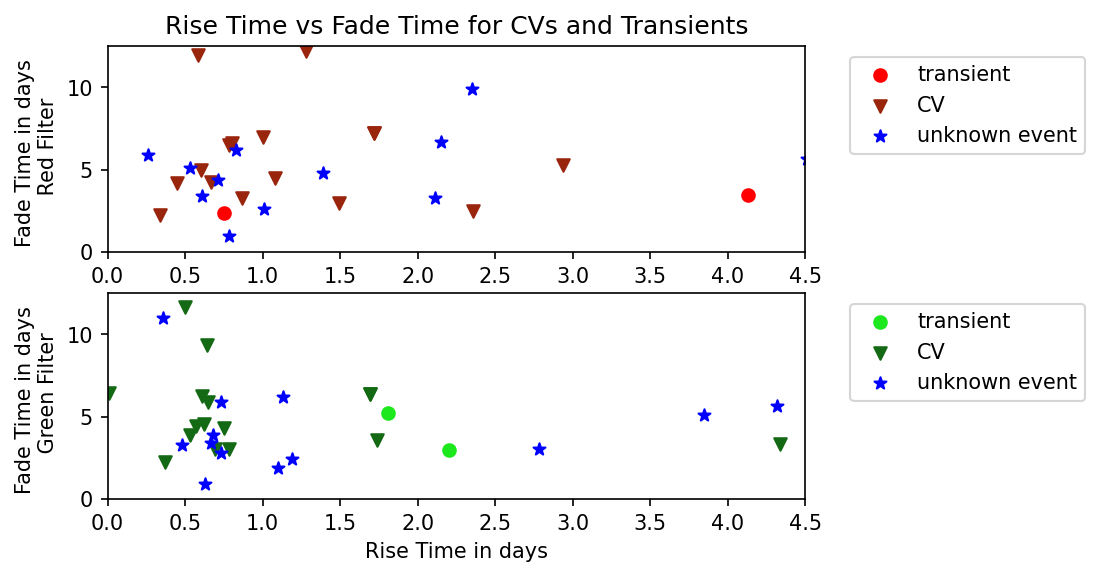

In [164]:
# plot of points with red filter
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
red_trans_rise = red_rise[0:4]
red_trans_rise = red_trans_rise[[False, True, False, True]]
red_trans_fade = red_fade[0:4]
red_trans_fade = red_trans_fade[[False, True, False, True]]
ax1.scatter([red_trans_rise], [red_trans_fade], c='red', label="transient")
red_cv_rise = red_rise[5:25]
red_cv_fade = red_fade[5:25]
ax1.scatter([red_cv_rise], [red_cv_fade], c='#99250C', marker='v', label="CV")
red_event_rise = red_rise[26:48]
#red_event_rise = red_event_rise[[]]
red_event_fade = red_fade[26:48]
#red_event_fade = red_event_fade[[False, True, True, False]]
ax1.scatter([red_event_rise], [red_event_fade], c='blue', marker='*', label="unknown event")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Rise Time vs Fade Time for CVs and Transients')
plt.ylabel(f'Fade Time in days \n Red Filter')

# plot of points with green filter
ax2 = plt.subplot(2,1,2)
green_trans_rise = green_rise[0:4]
green_trans_rise = green_trans_rise[[True, False, False, True]]
green_trans_fade = green_fade[0:4]
green_trans_fade = green_trans_fade[[True, False, False, True]]
ax2.scatter([green_trans_rise], [green_trans_fade], c='#1DE71D', label="transient")
green_cv_rise = green_rise[5:25]
green_cv_fade = green_fade[5:25]
ax2.scatter([green_cv_rise], [green_cv_fade], c='#146A14', marker='v', label="CV")
green_event_rise = green_rise[26:48]
#green_event_rise = green_event_rise[[False, True, True, False]]
green_event_fade = green_fade[26:48]
#green_event_fade = green_event_fade[[False, True, True, False]]
ax2.scatter([green_event_rise], [green_event_fade], c='blue', marker='*', label="unknown event")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# plot formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.xlabel("Rise Time in days")
plt.ylabel(f'Fade Time in days \n Green Filter')
plt.axis([0, 4.5, 0, 12.5])

# Adding text


In [6]:
eventpeak_red = data_table['true peak mag in red']
eventpeak_green = data_table['true peak mag in green']
hostpeak_red = data_table['true mag of counterpart in red']
hostpeak_green = data_table['true mag of counterpart in green']

Text(0, 0.5, 'Average Magnitude of Host Galaxy \n Green Filter')

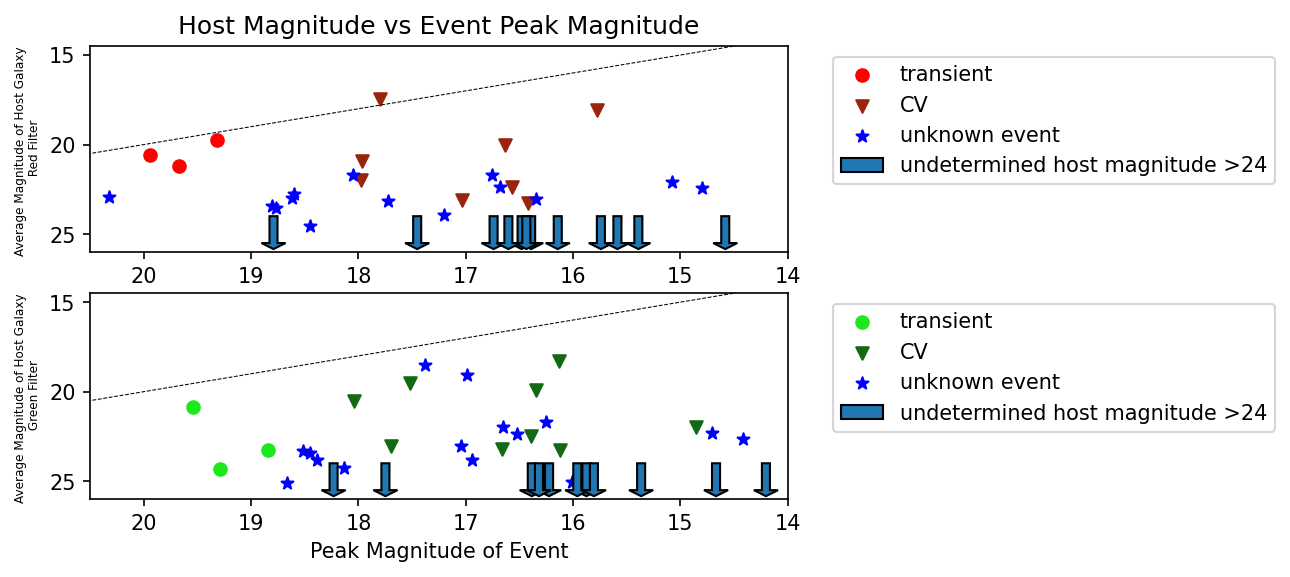

In [42]:
# events with red filter 
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
red_trans_peak = eventpeak_red[0:4]
red_trans_peak = red_trans_peak[[True, False, True, True]]
red_transhost_mag = hostpeak_red[0:4]
red_transhost_mag = red_transhost_mag[[True, False, True, True]]
ax1.scatter([red_trans_peak], [red_transhost_mag], c='red', label="transient")
red_cv_peak = eventpeak_red[5:25]
red_cvhost_mag = hostpeak_red[5:25]
ax1.scatter([red_cv_peak], [red_cvhost_mag], c='#99250C', marker='v', label="CV")
red_event_peak = eventpeak_red[26:48]
red_eventhost_mag = hostpeak_red[26:48]
ax1.scatter([red_event_peak], [red_eventhost_mag], c='blue', marker='*', label="unknown event")

ax1.arrow(18.792, 24, 0, 1.5, width = 0.075, label='undetermined host magnitude >24')
ax1.arrow(15.741, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.143, 24, 0, 1.5, width = 0.075)
ax1.arrow(14.582, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.741, 24, 0, 1.5, width = 0.075)
ax1.arrow(15.587, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.48, 24, 0, 1.5, width = 0.075)
ax1.arrow(15.392, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.391, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.4359, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.603, 24, 0, 1.5, width = 0.075)
ax1.arrow(17.453, 24, 0, 1.5, width = 0.075)


ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Host Magnitude vs Event Peak Magnitude')
plt.ylabel(f'Average Magnitude of Host Galaxy \n Red Filter', fontsize='xx-small')

# adding line
xplot = np.linspace(0, 30, 10000)
yplot = xplot
ax1.plot(xplot, yplot, c='black', ls='--', lw=0.5)

# events with green filter
ax2 = plt.subplot(2,1,2)
green_trans_peak = eventpeak_green[0:4]
green_trans_peak = green_trans_peak[[True, False, True, True]]
green_transhost_mag = hostpeak_green[0:4]
green_transhost_mag = green_transhost_mag[[True, False, True, True]]
ax2.scatter([green_trans_peak], [green_transhost_mag], c='#1DE71D', label="transient")
green_cv_peak = eventpeak_green[5:25]
green_cvhost_mag = hostpeak_green[5:25]
ax2.scatter([green_cv_peak], [green_cvhost_mag], c='#146A14', marker='v', label="CV")
green_event_peak = eventpeak_green[26:48]
green_eventhost_mag = hostpeak_green[26:48]
ax2.scatter([green_event_peak], [green_eventhost_mag], c='blue', marker='*', label="unknown event")

ax2.arrow(18.232, 24, 0, 1.5, width = 0.075, label='undetermined host magnitude >24')
ax2.arrow(16.224, 24, 0, 1.5, width = 0.075)
ax2.arrow(14.203, 24, 0, 1.5, width = 0.075)
ax2.arrow(16.385, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.366, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.876, 24, 0, 1.5, width = 0.075)
ax2.arrow(14.668, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.961, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.806, 24, 0, 1.5, width = 0.075)
ax2.arrow(16.318, 24, 0, 1.5, width = 0.075)
ax2.arrow(17.749, 24, 0, 1.5, width = 0.075)

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# adding line
xplot = np.linspace(0, 30, 10000)
yplot = xplot
ax2.plot(xplot, yplot, c='black', ls='--', lw=0.5)

# plot formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.set_xlim(20.5, 14)
ax1.set_ylim(26, 14.5)

# adding text

plt.xlabel("Peak Magnitude of Event")
plt.ylabel(f'Average Magnitude of Host Galaxy \n Green Filter', fontsize='xx-small')

Text(0, 0.5, 'Average Magnitude of Host Galaxy \n Green Filter')

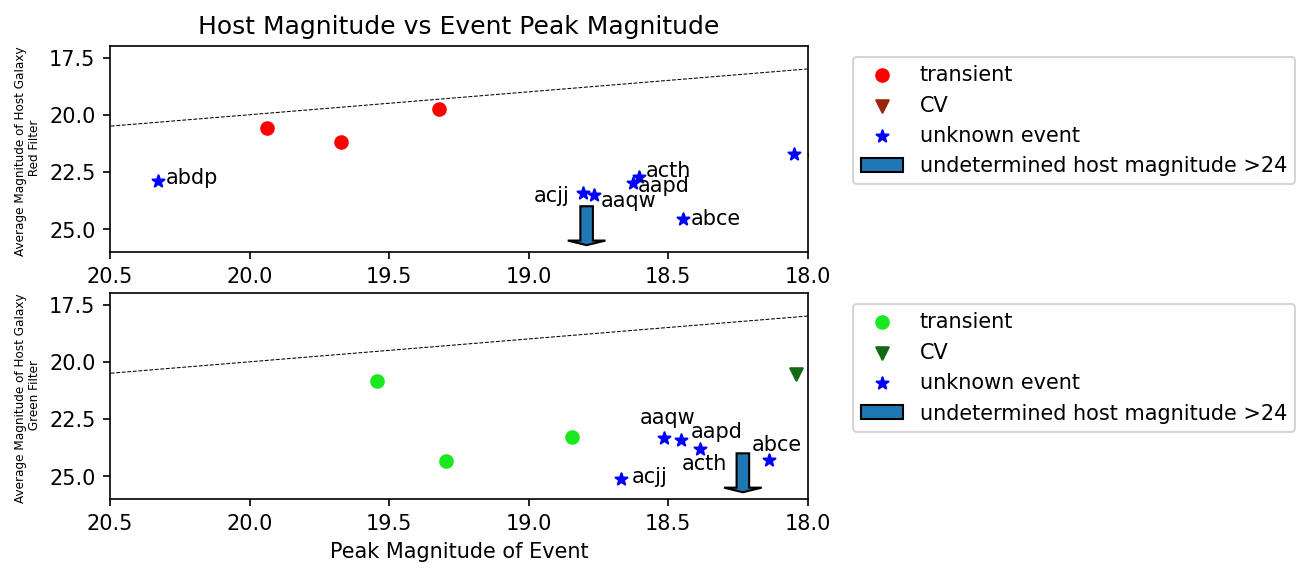

In [162]:
# events with red filter 
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
red_trans_peak = eventpeak_red[0:4]
red_trans_peak = red_trans_peak[[True, False, True, True]]
red_transhost_mag = hostpeak_red[0:4]
red_transhost_mag = red_transhost_mag[[True, False, True, True]]
ax1.scatter([red_trans_peak], [red_transhost_mag], c='red', label="transient")
red_cv_peak = eventpeak_red[5:25]
red_cvhost_mag = hostpeak_red[5:25]
ax1.scatter([red_cv_peak], [red_cvhost_mag], c='#99250C', marker='v', label="CV")
red_event_peak = eventpeak_red[26:48]
red_eventhost_mag = hostpeak_red[26:48]
ax1.scatter([red_event_peak], [red_eventhost_mag], c='blue', marker='*', label="unknown event")

ax1.arrow(18.792, 24, 0, 1.5, width = 0.045, label='undetermined host magnitude >24')
ax1.arrow(15.741, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.143, 24, 0, 1.5, width = 0.075)
ax1.arrow(14.582, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.741, 24, 0, 1.5, width = 0.075)
ax1.arrow(15.587, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.48, 24, 0, 1.5, width = 0.075)
ax1.arrow(15.392, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.391, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.4359, 24, 0, 1.5, width = 0.075)
ax1.arrow(16.603, 24, 0, 1.5, width = 0.075)
ax1.arrow(17.453, 24, 0, 1.5, width = 0.075)


ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Host Magnitude vs Event Peak Magnitude')
plt.ylabel(f'Average Magnitude of Host Galaxy \n Red Filter', fontsize='xx-small')

# adding line
xplot = np.linspace(0, 30, 10000)
yplot = xplot
ax1.plot(xplot, yplot, c='black', ls='--', lw=0.5)

# events with green filter
ax2 = plt.subplot(2,1,2)
green_trans_peak = eventpeak_green[0:4]
green_trans_peak = green_trans_peak[[True, False, True, True]]
green_transhost_mag = hostpeak_green[0:4]
green_transhost_mag = green_transhost_mag[[True, False, True, True]]
ax2.scatter([green_trans_peak], [green_transhost_mag], c='#1DE71D', label="transient")
green_cv_peak = eventpeak_green[5:25]
green_cvhost_mag = hostpeak_green[5:25]
ax2.scatter([green_cv_peak], [green_cvhost_mag], c='#146A14', marker='v', label="CV")
green_event_peak = eventpeak_green[26:48]
green_eventhost_mag = hostpeak_green[26:48]
ax2.scatter([green_event_peak], [green_eventhost_mag], c='blue', marker='*', label="unknown event")

ax2.arrow(18.232, 24, 0, 1.5, width = 0.045, label='undetermined host magnitude >24')
ax2.arrow(16.224, 24, 0, 1.5, width = 0.075)
ax2.arrow(14.203, 24, 0, 1.5, width = 0.075)
ax2.arrow(16.385, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.366, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.876, 24, 0, 1.5, width = 0.075)
ax2.arrow(14.668, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.961, 24, 0, 1.5, width = 0.075)
ax2.arrow(15.806, 24, 0, 1.5, width = 0.075)
ax2.arrow(16.318, 24, 0, 1.5, width = 0.075)
ax2.arrow(17.749, 24, 0, 1.5, width = 0.075)

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# adding line
xplot = np.linspace(0, 30, 10000)
yplot = xplot
ax2.plot(xplot, yplot, c='black', ls='--', lw=0.5)

# plot formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.set_xlim(20.5, 18)
ax1.set_ylim(26, 17)

# adding text
ax1.text(18.98, 23.8, 'acjj')
ax1.text(18.74, 24, 'aaqw')
ax1.text(20.3, 23, 'abdp')
ax1.text(18.607, 23.34, 'aapd')
ax1.text(18.58, 22.7, 'acth')
ax1.text(18.42, 24.8, 'abce')

ax2.text(18.63, 25.3, 'acjj')
ax2.text(18.42, 23.3, 'aapd')
ax2.text(18.6, 22.7, 'aaqw')
ax2.text(18.45, 24.7, 'acth')
ax2.text(18.2, 23.9, 'abce')

plt.xlabel("Peak Magnitude of Event")
plt.ylabel(f'Average Magnitude of Host Galaxy \n Green Filter', fontsize='xx-small')

In [56]:
peakmag_red = data_table['true peak mag in red']
peakmag_green = data_table['true peak mag in green']
color = data_table['real color : g -r']

Text(0, 0.5, 'Peak Magnitude of Event \n Green Filter')

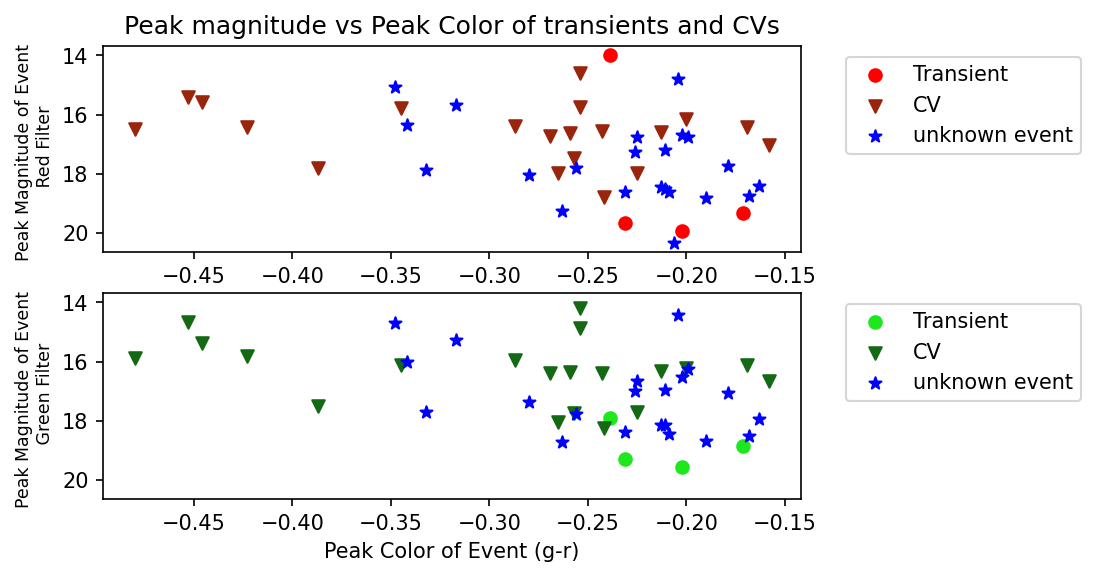

In [132]:
# plot of transients and CVs, peak mag has been corrected for extinction

# red filter plot
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
r_trans_peak_color = color[0:4]
r_trans_peak_mag = peakmag_red[0:4]
ax1.scatter(r_trans_peak_color, r_trans_peak_mag, c='red', marker='o', label='Transient')

r_cv_peak_color = color[5:25]
r_cv_peak_mag = peakmag_red[5:25]
ax1.scatter(r_cv_peak_color, r_cv_peak_mag, marker='v', c='#99250C', label='CV')

r_event_peak_color = color[26:48]
r_event_peak_mag = peakmag_red[26:48]
ax1.scatter(r_event_peak_color, r_event_peak_mag, c='blue', marker='*', label='unknown event')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

plt.title('Peak magnitude vs Peak Color of transients and CVs')
plt.ylabel(f'Peak Magnitude of Event \n Red Filter', fontsize='small')

# green filter plot
ax2 = plt.subplot(2,1,2)
g_trans_peak_color = color[0:4]
g_trans_peak_mag = peakmag_green[0:4]
plt.scatter(g_trans_peak_color, g_trans_peak_mag, c='#1DE71D', marker='o', label='Transient')

g_cv_peak_color = color[5:25]
g_cv_peak_mag = peakmag_green[5:25]
plt.scatter(g_cv_peak_color, g_cv_peak_mag, marker='v', c='#146A14', label='CV')

g_event_peak_color = color[26:48]
g_event_peak_mag = peakmag_green[26:48]
plt.scatter(g_event_peak_color, g_event_peak_mag, c='blue', marker='*', label='unknown event')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# adding text


plt.xlabel("Peak Color of Event (g-r)")
plt.ylabel(f'Peak Magnitude of Event \n Green Filter', fontsize='small')

Text(0, 0.5, 'Peak Magnitude of Event \n Green Filter')

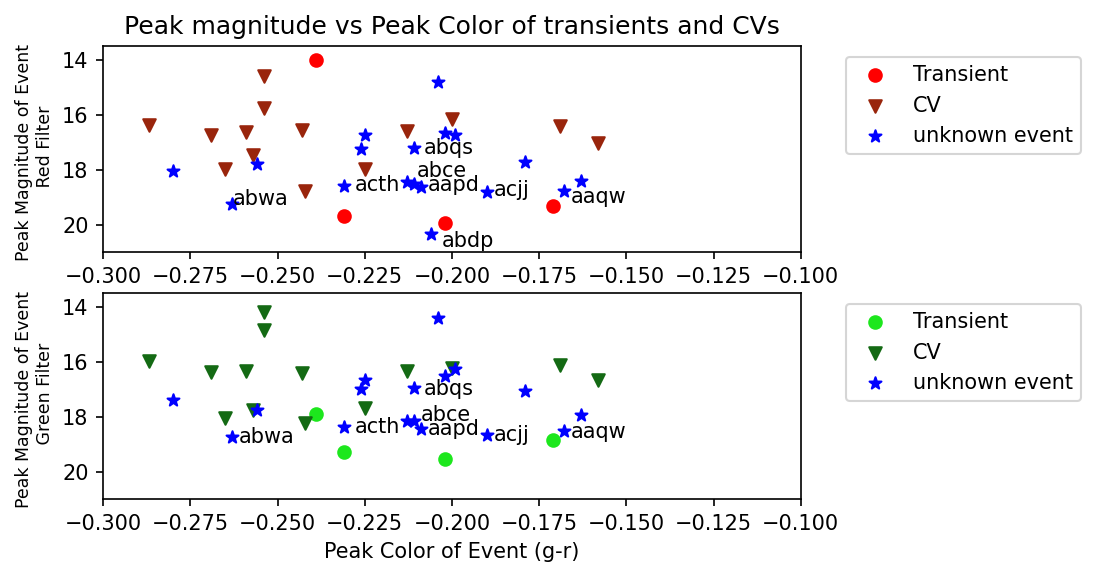

In [148]:
# plot of transients and CVs, peak mag has been corrected for extinction

# red filter plot
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
r_trans_peak_color = color[0:4]
r_trans_peak_mag = peakmag_red[0:4]
ax1.scatter(r_trans_peak_color, r_trans_peak_mag, c='red', marker='o', label='Transient')

r_cv_peak_color = color[5:25]
r_cv_peak_mag = peakmag_red[5:25]
ax1.scatter(r_cv_peak_color, r_cv_peak_mag, marker='v', c='#99250C', label='CV')

r_event_peak_color = color[26:48]
r_event_peak_mag = peakmag_red[26:48]
ax1.scatter(r_event_peak_color, r_event_peak_mag, c='blue', marker='*', label='unknown event')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

plt.title('Peak magnitude vs Peak Color of transients and CVs')
plt.ylabel(f'Peak Magnitude of Event \n Red Filter', fontsize='small')

# green filter plot
ax2 = plt.subplot(2,1,2)
g_trans_peak_color = color[0:4]
g_trans_peak_mag = peakmag_green[0:4]
plt.scatter(g_trans_peak_color, g_trans_peak_mag, c='#1DE71D', marker='o', label='Transient')

g_cv_peak_color = color[5:25]
g_cv_peak_mag = peakmag_green[5:25]
plt.scatter(g_cv_peak_color, g_cv_peak_mag, marker='v', c='#146A14', label='CV')

g_event_peak_color = color[26:48]
g_event_peak_mag = peakmag_green[26:48]
plt.scatter(g_event_peak_color, g_event_peak_mag, c='blue', marker='*', label='unknown event')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# formatting
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.set_xlim(-0.30, -0.10)
ax1.set_ylim(21, 13.5)

# adding text
ax1.text(-0.188, 18.95, 'acjj')
ax1.text(-0.203, 20.8, 'abdp')
ax1.text(-0.207, 18.75, 'aapd')
ax1.text(-0.228, 18.75, 'acth')
ax1.text(-0.166, 19.2, 'aaqw')
ax1.text(-0.263, 19.256, 'abwa')
ax1.text(-0.21, 18.25, 'abce')
ax1.text(-0.208, 17.4, 'abqs')

ax2.text(-0.188, 18.88, 'acjj')
ax2.text(-0.207, 18.65, 'aapd')
ax2.text(-0.228, 18.58, 'acth')
ax2.text(-0.166, 18.75, 'aaqw')
ax2.text(-0.261, 18.93, 'abwa')
ax2.text(-0.209, 18.138, 'abce')
ax2.text(-0.208, 17.2, 'abqs')

plt.xlabel("Peak Color of Event (g-r)")
plt.ylabel(f'Peak Magnitude of Event \n Green Filter', fontsize='small')

In [101]:
angular_separation = data_table['angular separation between event and counterpart']
magnitude_red = data_table['true mag of counterpart in red']
magnitude_green = data_table['true mag of counterpart in green']

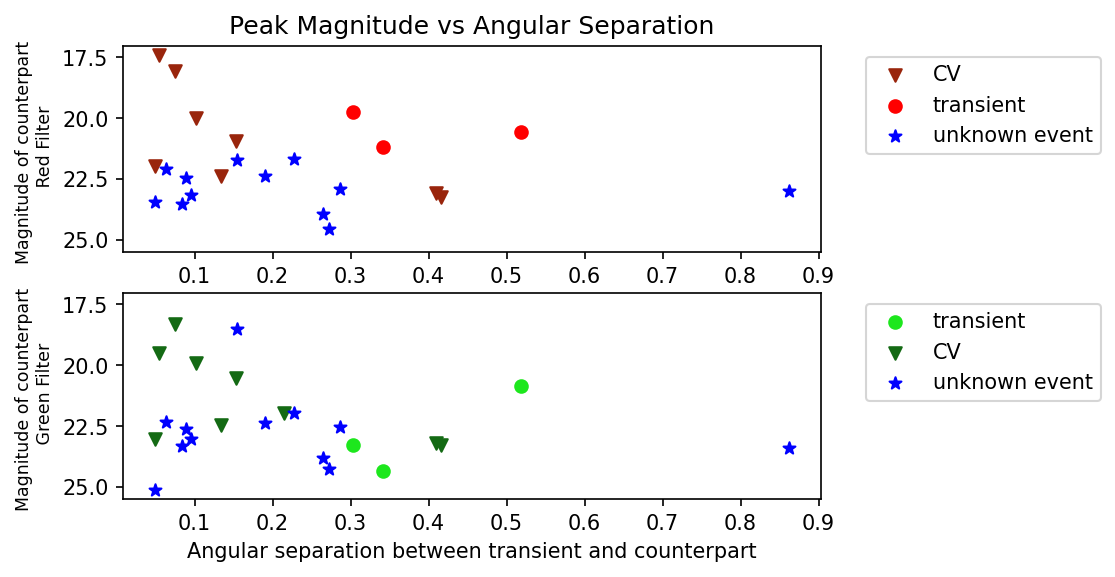

In [102]:
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
angular_separation_cv = angular_separation[5:25]
angular_separation_trans = angular_separation[0:4]
angular_separation_trans = angular_separation_trans[[True, False, True, True]]
angular_separation_event = angular_separation[26:48]
hostcv_mag_red = magnitude_red[5:25]
hosttrans_mag_red = magnitude_red[0:4]
hosttrans_mag_red = hosttrans_mag_red[[True, False, True, True]]
hostevent_mag_red = magnitude_red[26:48]

ax1.scatter([angular_separation_cv], [hostcv_mag_red], c='#99250C', marker='v', label="CV")
ax1.scatter(angular_separation_trans, hosttrans_mag_red, c='red', label="transient")
ax1.scatter([angular_separation_event], [hostevent_mag_red], c='blue', marker='*', label='unknown event')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

plt.title('Peak Magnitude vs Angular Separation')
plt.ylabel(f'Magnitude of counterpart \n Red Filter', fontsize='small')

# scatterplot of angular separation vs host magnitude in green
ax2 = plt.subplot(2,1,2) 
hostcv_mag_green = magnitude_green[5:25]
hosttrans_mag_green = magnitude_green[0:4]
hosttrans_mag_green = hosttrans_mag_green[[True, False, True, True]]
hostevent_mag_green = magnitude_green[26:48]

ax2.scatter([angular_separation_trans], [hosttrans_mag_green], c='#1DE71D', label="transient")
ax2.scatter([angular_separation_cv], [hostcv_mag_green], c='#146A14', marker='v', label="CV")
ax2.scatter([angular_separation_event], [hostevent_mag_green], c='blue', marker='*', label='unknown event')

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# adding text

plt.xlabel("Angular separation between transient and counterpart")
plt.ylabel(f'Magnitude of counterpart \n Green Filter', fontsize='small')
plt.show()

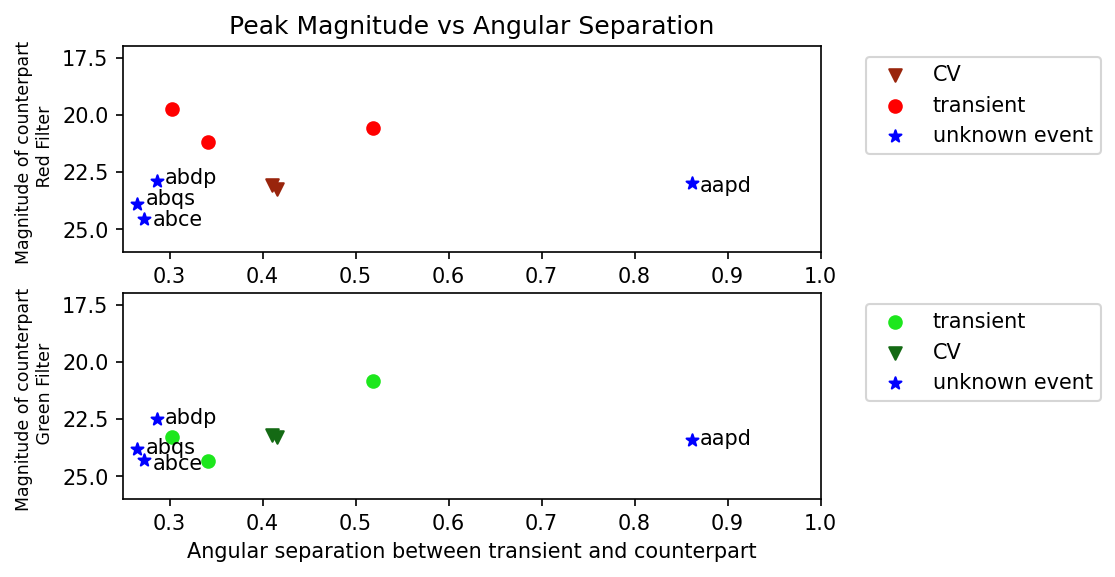

In [128]:
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
angular_separation_cv = angular_separation[5:25]
angular_separation_trans = angular_separation[0:4]
angular_separation_trans = angular_separation_trans[[True, False, True, True]]
angular_separation_event = angular_separation[26:48]
hostcv_mag_red = magnitude_red[5:25]
hosttrans_mag_red = magnitude_red[0:4]
hosttrans_mag_red = hosttrans_mag_red[[True, False, True, True]]
hostevent_mag_red = magnitude_red[26:48]

ax1.scatter([angular_separation_cv], [hostcv_mag_red], c='#99250C', marker='v', label="CV")
ax1.scatter(angular_separation_trans, hosttrans_mag_red, c='red', label="transient")
ax1.scatter([angular_separation_event], [hostevent_mag_red], c='blue', marker='*', label='unknown event')

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

plt.title('Peak Magnitude vs Angular Separation')
plt.ylabel(f'Magnitude of counterpart \n Red Filter', fontsize='small')

# scatterplot of angular separation vs host magnitude in green
ax2 = plt.subplot(2,1,2) 
hostcv_mag_green = magnitude_green[5:25]
hosttrans_mag_green = magnitude_green[0:4]
hosttrans_mag_green = hosttrans_mag_green[[True, False, True, True]]
hostevent_mag_green = magnitude_green[26:48]

ax2.scatter([angular_separation_trans], [hosttrans_mag_green], c='#1DE71D', label="transient")
ax2.scatter([angular_separation_cv], [hostcv_mag_green], c='#146A14', marker='v', label="CV")
ax2.scatter([angular_separation_event], [hostevent_mag_green], c='blue', marker='*', label='unknown event')

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
ax1.set_xlim(0.25, 1)
ax1.set_ylim(26, 17)

# adding text
ax1.text(0.295, 23, 'abdp')
ax1.text(0.87, 23.35, 'aapd')
ax1.text(0.274, 23.92, 'abqs')
ax1.text(0.282, 24.84, 'abce')

ax2.text(0.295, 22.72, 'abdp')
ax2.text(0.87, 23.61, 'aapd')
ax2.text(0.274, 24.02, 'abqs')
ax2.text(0.282, 24.7, 'abce')

plt.xlabel("Angular separation between transient and counterpart")
plt.ylabel(f'Magnitude of counterpart \n Green Filter', fontsize='small')
plt.show()